In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
import seaborn as sns
from scipy.stats import boxcox

## Quantitative Analysis

### Loading all datasets ( Gold, Silver, Crude Oil, USD, Interest rate and Stock index)

  - Date : in days
  - Open : price of the stock at the opening of the trading (in US dollars)
  - High : highest price of the stock during the trading day (in US dollars)
  - Low : lowest price of the stock during the trading day (in US dollars)
  - Close : price of the stock at the closing of the trading (in US dollars)
  - Volume : amount of stocks traded (in US dollars)
  - Adj Close : price of the stock at the closing of the trading adjusted with dividends (in US dollars)

In [2]:
# Import Gold data in panda and passed to a variable name "df1"
df1 = pd.read_csv("Gold.csv", parse_dates = True, index_col=0)
df1= df1.rename(columns={'Open': 'Gold'})
df1.head()

,Gold,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300


In [3]:
# Import Silver data in panda and passed to a variable name "df2"
df2 = pd.read_csv("Silver.csv", parse_dates = True, index_col=0)
df2= df2.rename(columns={'Price': 'Silver'})
df2.head()

,Silver,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-04,5.335,5.290,5.290,5.290,0.00K,-1.44%
2000-01-05,5.170,5.170,5.170,5.170,-,-3.09%
2000-01-06,5.127,5.127,5.127,5.127,-,-0.83%
2000-01-07,5.150,5.150,5.150,5.150,0.05K,0.45%
2000-01-10,5.145,5.145,5.145,5.145,0.06K,-0.10%


In [4]:
# Import USD data in panda and passed to a variable name "df3"
df3 = pd.read_csv("USD_Index.csv", parse_dates = True, index_col=0)
df3 = df3.rename(columns={'Price': 'USD'})
df3.head()

,USD,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-03,99.89,101.39,101.57,99.85,2.62K,-1.62%
2000-01-04,100.10,100.18,100.37,99.70,1.00K,0.21%
2000-01-05,100.05,100.09,100.16,99.40,0.89K,-0.05%
2000-01-06,100.34,100.05,100.48,99.60,1.55K,0.29%
2000-01-07,100.50,100.18,100.70,100.16,2.85K,0.16%


In [5]:
# Import Oil data in panda and passed to a variable name "df4"
df4 = pd.read_csv("Crude_Oil.csv", parse_dates = True, index_col=0)
df4 = df4.rename(columns={'Price': 'Oil'})
df4.head()

,Oil,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%
2000-01-10,24.67,24.22,24.75,24.02,68.90K,1.86%


In [6]:
# Import Interest data in panda and passed to a variable name "df5"
df5 = pd.read_csv("Interest_Rate.csv", parse_dates = True, index_col=0)
df5 = df5.rename(columns={'Open': 'Interest'})
df5.head()

,Interest,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,6.377,6.440,6.377,6.435,6.435,0.0
2000-01-03,6.498,6.603,6.498,6.548,6.548,0.0
2000-01-04,6.530,6.548,6.485,6.485,6.485,0.0
2000-01-05,6.521,6.599,6.508,6.599,6.599,0.0
2000-01-06,6.558,6.585,6.540,6.549,6.549,0.0


In [7]:
# Import Stock data in panda and passed to a variable name "df6"
df6 = pd.read_csv("Stock_Index.csv", parse_dates = True, index_col=0)
df6 = df6.rename(columns={'Open': 'Stock'})
df6.head()

,Stock,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,6876.100098,6876.100098,6876.100098,6876.100098,6876.100098,0
2000-01-03,6762.109863,6762.109863,6762.109863,6762.109863,6762.109863,0
2000-01-04,6543.759766,6543.759766,6543.759766,6543.759766,6543.759766,0
2000-01-05,6567.029785,6567.029785,6567.029785,6567.029785,6567.029785,0
2000-01-06,6635.439941,6635.439941,6635.439941,6635.439941,6635.439941,0


##### Combining all dataframes

In [8]:
dataset = pd.concat([df1.Gold, df2.Silver, df3.USD, df4.Oil, df5.Interest, df6.Stock], axis=1)
dataset.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
1999-12-31,17.9375,NaN,NaN,NaN,6.377,6876.100098
2000-01-03,17.5625,NaN,99.89,NaN,6.498,6762.109863
2000-01-04,17.3125,5.335,100.10,25.55,6.530,6543.759766
2000-01-05,17.5625,5.170,100.05,24.91,6.521,6567.029785
2000-01-06,17.7500,5.127,100.34,24.78,6.558,6635.439941


In [9]:
dataset.isnull().sum()  # checking null values in dataset

Gold        535
Silver      418
USD         443
Oil         478
Interest    539
Stock       535
dtype: int64

In [10]:
df = dataset.loc['2000-01-01' : ]
df.tail()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2019-05-27,NaN,NaN,97.477,59.16,NaN,NaN
2019-05-28,11.70,NaN,97.842,59.14,2.299,12597.70996
2019-05-29,11.73,NaN,98.035,58.81,2.231,12398.24023
2019-05-30,11.76,NaN,98.053,56.59,2.261,12402.54004
2019-05-31,NaN,NaN,97.877,55.09,NaN,NaN


In [11]:
df.head()

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2000-01-03,17.5625,NaN,99.89,NaN,6.498,6762.109863
2000-01-04,17.3125,5.335,100.10,25.55,6.530,6543.759766
2000-01-05,17.5625,5.170,100.05,24.91,6.521,6567.029785
2000-01-06,17.7500,5.127,100.34,24.78,6.558,6635.439941
2000-01-07,17.8125,5.150,100.50,24.22,6.545,6792.669922


In [12]:
df.fillna(0)  # filling all NaN values with 0

,Gold,Silver,USD,Oil,Interest,Stock
Date,,,,,,
2000-01-03,17.5625,0.000,99.890,0.00,6.498,6762.109863
2000-01-04,17.3125,5.335,100.100,25.55,6.530,6543.759766
2000-01-05,17.5625,5.170,100.050,24.91,6.521,6567.029785
2000-01-06,17.7500,5.127,100.340,24.78,6.558,6635.439941
2000-01-07,17.8125,5.150,100.500,24.22,6.545,6792.669922
2000-01-10,17.4375,5.145,100.650,24.67,6.540,6838.450195
2000-01-11,17.4375,5.150,100.260,25.77,6.600,6774.479980
2000-01-12,17.3750,5.100,100.330,26.28,6.659,6766.549805
2000-01-13,17.3125,5.115,100.670,26.69,6.664,6836.759766


In [13]:
df.describe()  # statistics

,Gold,Silver,USD,Oil,Interest,Stock
count,4882.000000,5000.000000,4975.000000,4940.000000,4878.000000,4882.000000
mean,24.931554,15.600886,90.434783,62.081427,3.469230,8460.449765
std,11.982406,9.116484,11.707772,26.486885,1.223064,2198.998598
min,6.080000,4.026000,71.304000,17.450000,1.336000,4226.310059
25%,15.900000,7.033000,80.884500,40.060000,2.390000,6726.550049
50%,19.950001,15.627000,88.220000,59.360000,3.428500,8105.054931
75%,33.500000,19.448750,96.898500,83.760000,4.434000,10259.119878
max,55.540001,48.584000,121.210000,145.290000,6.781000,13592.799810


#### Exploring Rolling Mean and Return Rate of Gold Stock¶

I will include the most popular technical indicator moving average and exponential moving average here.
The Moving Average makes the line smooth and display the increasing or decreasing trend in price.

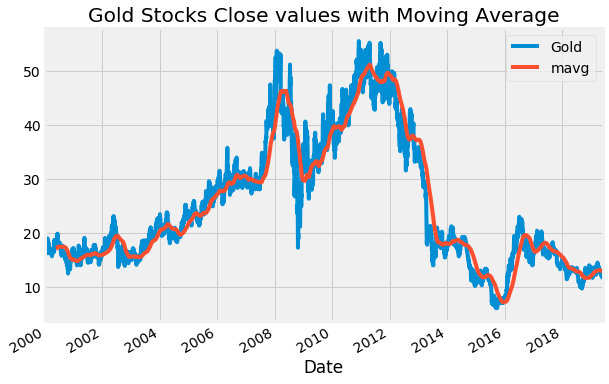

In [13]:
close = df1['Gold']
mavg = close.rolling(window=100).mean()

from matplotlib import style
plt.figure(figsize=(10,6))
import seaborn as sns

plt.style.use('fivethirtyeight')

# plotting
close.plot(label='Gold')
mavg.plot(label='mavg')
plt.title('Gold Stocks Close values with Moving Average')
plt.legend()

Text(0.5, 1.0, 'Gold Return Rate')

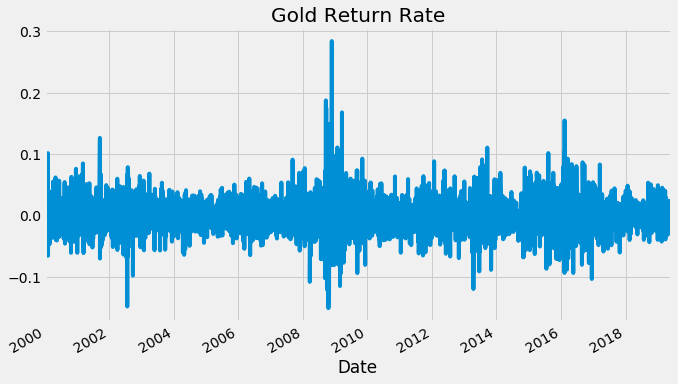

In [14]:
#Based on the formula, plotting the returns
rets = close / close.shift(1) - 1

from matplotlib import style
plt.figure(figsize=(10,6))
rets.plot(label='return')
plt.title('Gold Return Rate')

#### Analyzing other variables (Silver, Oil, Interest, Stock and USD)

<Figure size 720x432 with 0 Axes>

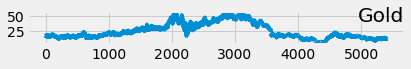

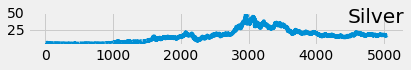

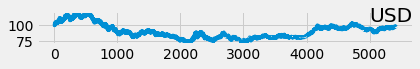

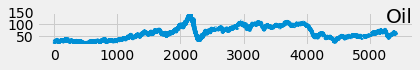

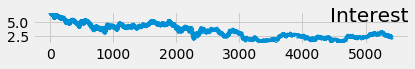

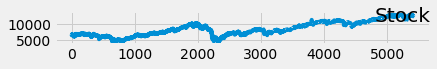

In [15]:
values = df.values

# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
from matplotlib import style
plt.figure(figsize=(10,6))
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
    plt.show()

C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


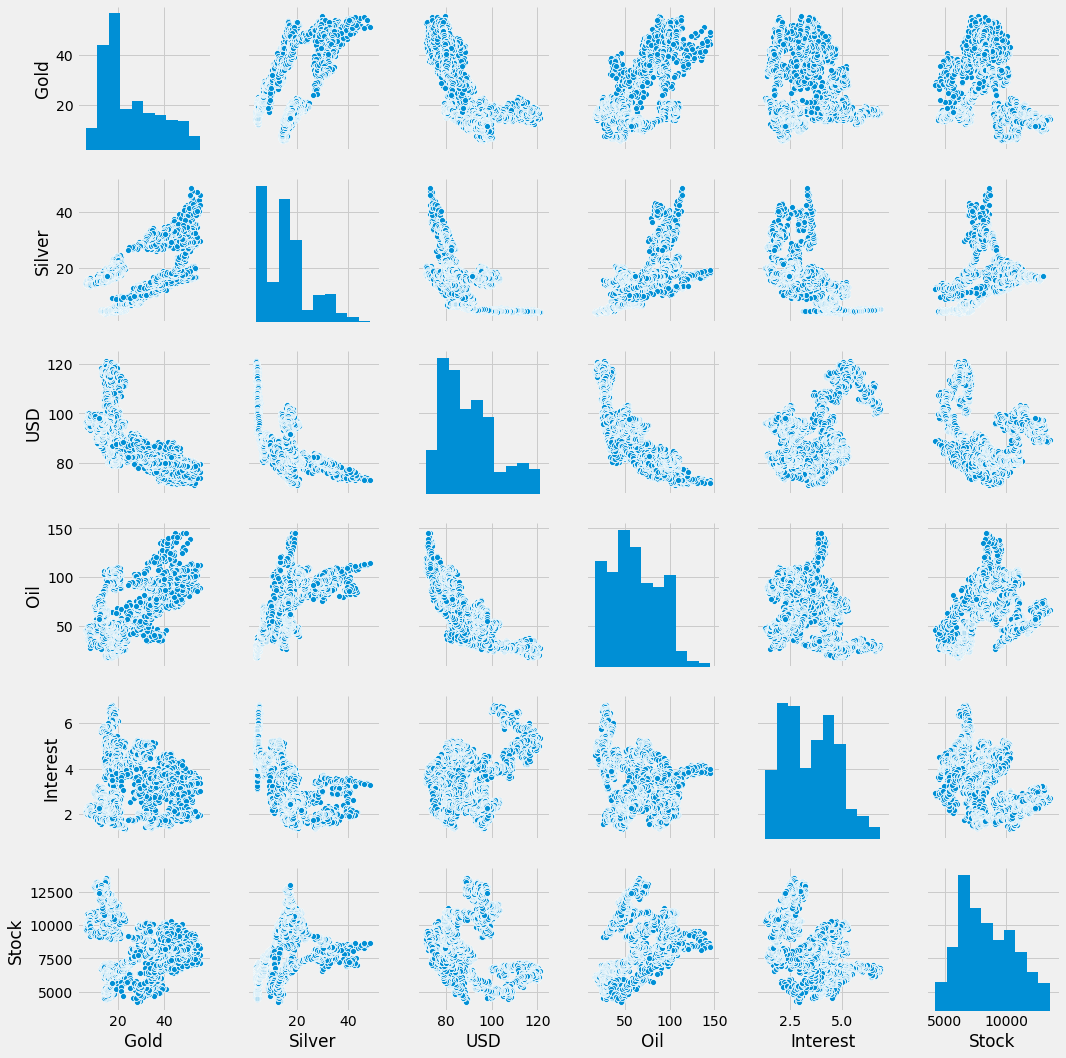

In [16]:
sns.pairplot(df)  # plot on original data

#### Correlation Analysis  to check if any of the variables affect others

This analysis was done using % change to find how much the price changes compared to the previous day which defines returns. Knowing the correlation will help to see whether the returns are affected by other stocks’ returns

In [17]:
from scipy.stats.stats import pearsonr
rets = df.pct_change()
corr = rets.corr(method='pearson')
corr

,Gold,Silver,USD,Oil,Interest,Stock
Gold,1.000000,0.387850,-0.237205,0.125524,-0.067287,0.141101
Silver,0.387850,1.000000,-0.361730,0.247860,-0.000599,0.115026
USD,-0.237205,-0.361730,1.000000,-0.200472,-0.008399,-0.056615
Oil,0.125524,0.247860,-0.200472,1.000000,0.107823,0.079526
Interest,-0.067287,-0.000599,-0.008399,0.107823,1.000000,0.211164
Stock,0.141101,0.115026,-0.056615,0.079526,0.211164,1.000000


Text(0, 0.5, 'Returns Oil')

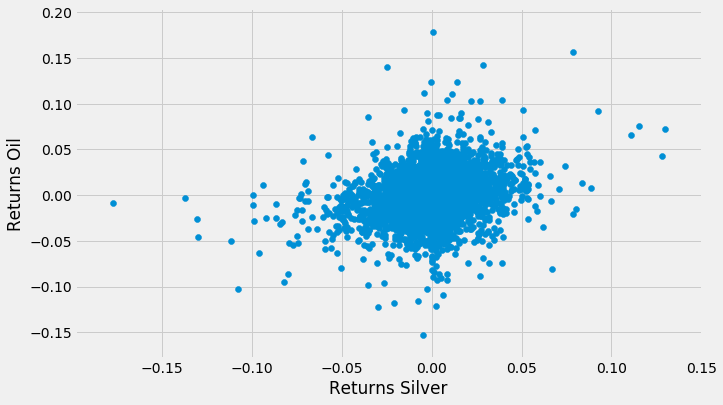

In [18]:
from matplotlib import style
plt.figure(figsize=(10,6))
plt.scatter(rets.Silver, rets.Oil)
plt.xlabel('Returns Silver')
plt.ylabel('Returns Oil')

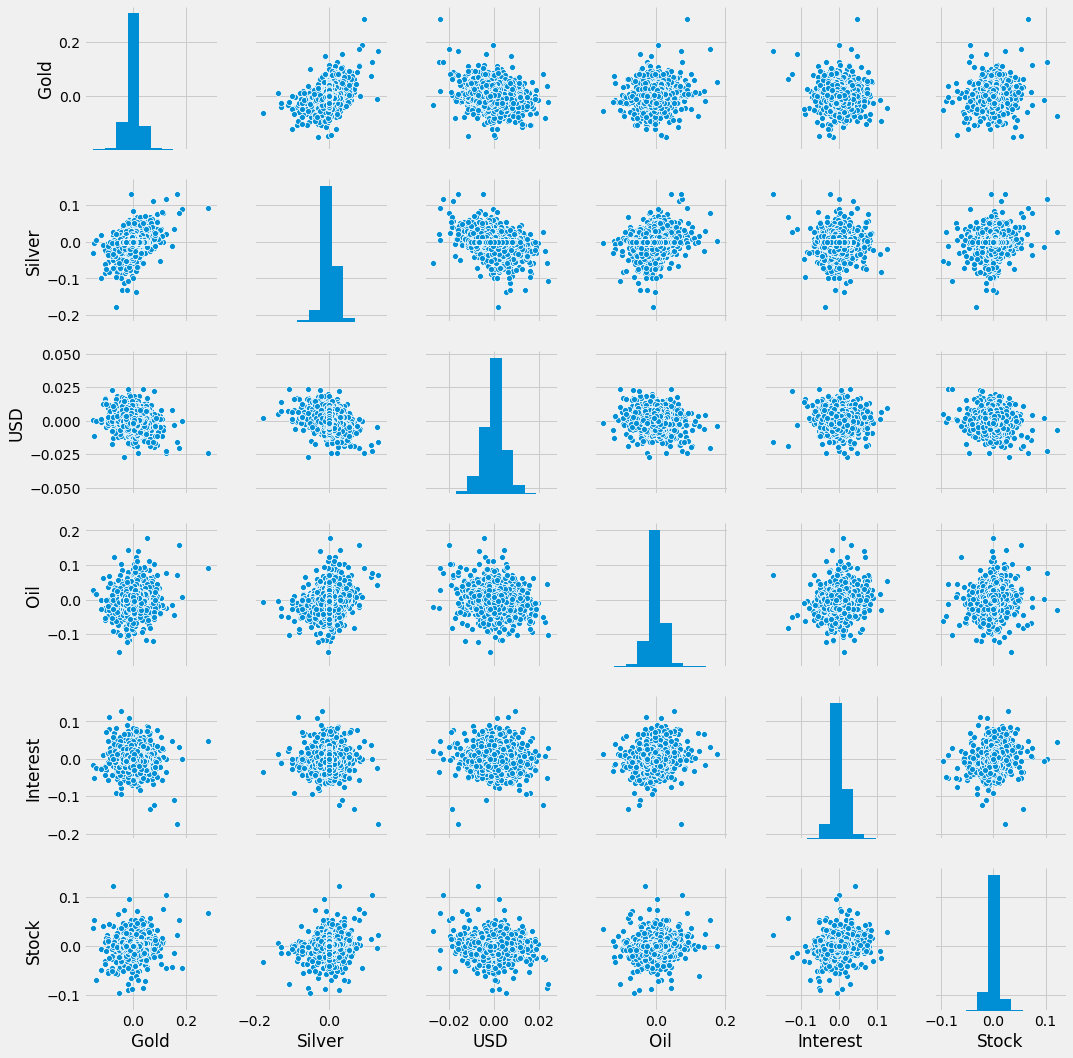

In [19]:
sns.pairplot(rets) 

Above plot displays most of the distributions approximately positive correlations, but there are some negative correlations too as per the correlation m,atrix above.

Used heatmap below to visualize the correlation ranges among the stocks. In the heatmap, lighter the color, the more correlated the two stocks are.

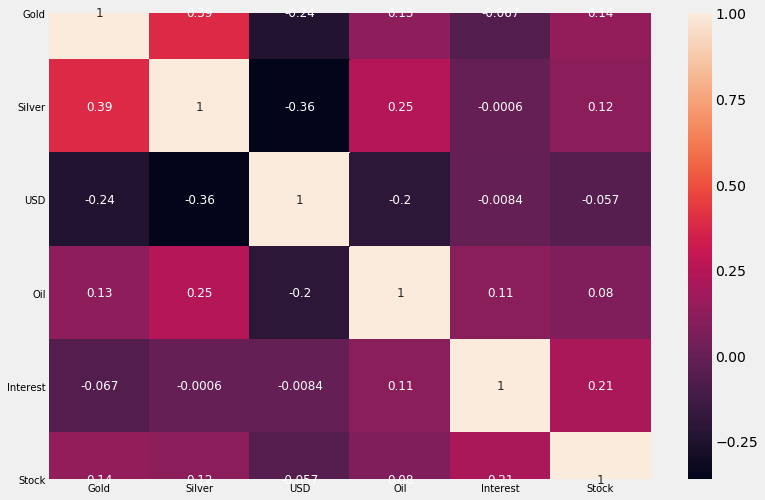

In [20]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(12,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Stocks Returns Rate and Risk

Besides correlation, will analyse stock’s risks and returns by extracting the average of returns and the standard deviation of returns which is the risk associated.  There could be causality associated showing the trend in the stock market and industry rather than showing how these stocks affect each other.

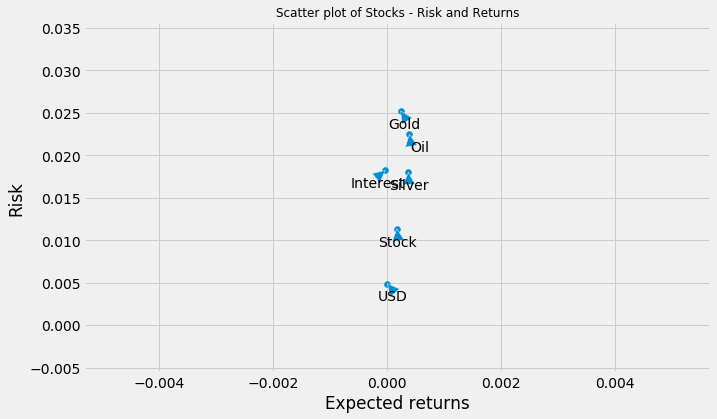

In [22]:
from matplotlib import style
plt.figure(figsize=(10,6))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x, y), xytext = (20, -20), textcoords = 'offset points', 
                 ha = 'right', va = 'bottom', arrowprops = dict(connectionstyle = 'arc3, rad=0'))
    plt.title('Scatter plot of Stocks - Risk and Returns', fontsize=12)

Could not draw any line to reflect buy and sell positions. USD, Stock and Interest varibales are not available to buy/sell, these are influencing factors for trading which are out of scope for this project.

#### Feature engineering

Selecting the features from open, high, low, close, adj close and volume of Gold stock. These features will be used to train the modle for making the predictions. These features are based on High Low Percentage, Percentage Change and daily return as given below. 

In [23]:
df1reg = df1.loc[:,['Adj Close','Volume']]

df1reg['HL_PCT'] = (df1['High'] - df1['Low']) / df1['Close'] * 100.0
df1reg['PCT_change'] = (df1['Close'] - df1['Gold']) / df1['Gold'] * 100.0
df1reg['Daily Return'] = df1['Adj Close'].pct_change()

df1reg.head()

,Adj Close,Volume,HL_PCT,PCT_change,Daily Return
Date,,,,,
1999-12-31,14.105929,557700,1.413428,-1.393728,NaN
2000-01-03,14.105929,1509900,4.240283,0.711744,0.000000
2000-01-04,13.906553,1787100,3.225806,0.722022,-0.014134
2000-01-05,14.155771,1285100,2.464789,1.067616,0.017921
2000-01-06,14.155771,1139300,1.760563,0.000000,0.000000


##### Pre-processing & Cross Validation

In [24]:
import sklearn.metrics, math
from sklearn import preprocessing

# Drop missing value
df1reg.fillna(value = -99999, inplace=True)

# We want to separate 1 % of the data for validation and to forecast
forecast_out = int(math.ceil(0.01 * len(df1reg)))

# Separating the label here, want to predict the AdjClose label
forecast_col = 'Adj Close'
df1reg['label'] = df1reg[forecast_col].shift(-forecast_out)

X = np.array(df1reg.drop(['label'], 1))

X = preprocessing.scale(X)

# Finally want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(df1reg['label'])
y = y[:-forecast_out]

In [25]:
from sklearn.model_selection import train_test_split

# split into test and train data), test_size = 0.2 ==> 20% data is test data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('length of X_train and x_test: ', len(X_train), len(X_test))

length of X_train and x_test:  3867 967


### Checking the benefit of transforming the targets before the regression model. 

The targets y are modified by: 

   - translating all targets such that all entries are non-negative and 
   - applying an exponential function to obtain non-linear targets which cannot be fitted using a simple linear model.

Therefore, used a logarithmic (np.log1p) and an exponential function (np.expm1) to transform the targets before training a linear regression model and using it for prediction.

<Figure size 720x432 with 0 Axes>

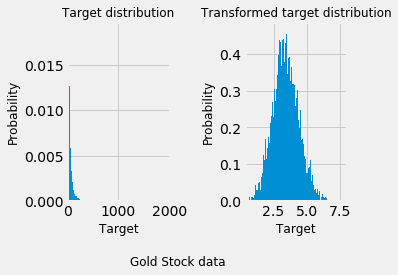

In [27]:
import matplotlib
from distutils.version import LooseVersion
from sklearn.datasets import make_regression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}
    
X, y = make_regression(n_samples=3906, noise=100, random_state=0)
y = np.exp((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

from matplotlib import style
plt.figure(figsize=(10,6))

f, (ax0, ax1) = plt.subplots(1, 2)
ax0.hist(y, bins=100, **density_param)
ax0.set_xlim([0, 2000])
ax0.set_ylabel('Probability', fontsize=12)
ax0.set_xlabel('Target', fontsize=12)
ax0.set_title('Target distribution', fontsize =12)

ax1.hist(y_trans, bins=100, **density_param)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_xlabel('Target', fontsize=12)
ax1.set_title('Transformed target distribution', fontsize =12)

f.suptitle("Gold Stock data", y=0.035, fontsize=12)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

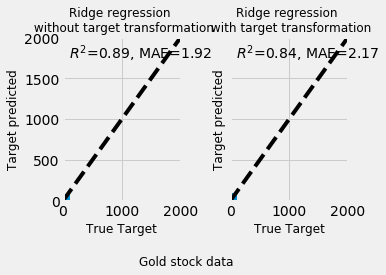

In [29]:
from sklearn.linear_model import RidgeCV

f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0.scatter(y_test, y_pred)
ax0.plot([0, 2000], [0, 2000], '--k')
ax0.set_ylabel('Target predicted', fontsize=12)
ax0.set_xlabel('True Target', fontsize=12)
ax0.set_title('Ridge regression \n without target transformation', fontsize =12)
ax0.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax0.set_xlim([0, 2000])
ax0.set_ylim([0, 2000])

regr_trans = TransformedTargetRegressor(regressor=RidgeCV(),
                                        func=np.log1p,
                                        inverse_func=np.expm1)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)

ax1.scatter(y_test, y_pred)
ax1.plot([0, 2000], [0, 2000], '--k')
ax1.set_ylabel('Target predicted', fontsize=12)
ax1.set_xlabel('True Target', fontsize=12)
ax1.set_title('Ridge regression \n with target transformation', fontsize=12)
ax1.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax1.set_xlim([0, 2000])
ax1.set_ylim([0, 2000])

f.suptitle("Gold stock data", y=0.035, fontsize=12)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

#### Looking at the MAE score from abobe plots, the effect of the transformer is weaker. 

## Machine learning

I will be using three machine learning models to predict the stock price using Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K Nearest Neighbor (KNN).

Further, will be using Monte-Carlo simulation and Artifical Neural Network (multilayer perceptron) on the same dataset to draw a comparison. 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [31]:
# Quadratic Regression 2
poly2 = make_pipeline(PolynomialFeatures(2), Ridge())
poly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [32]:
# Quadratic Regression 3
poly3 = make_pipeline(PolynomialFeatures(3), Ridge())
poly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [33]:
# KNN Regression
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

###### All the 4 models have been developed (Linear regression, Quadric regression 2 & 3 and knn)

#### Evaluation
Evaluating using the score method which finds the mean accuracy.

In [34]:
conf_reg = reg.score(X_test, y_test)
print('Linear regression confidence is:', conf_reg)
conf_poly2 = poly2.score(X_test,y_test)
print('Quadric regression2 confidence is:', conf_poly2)
conf_poly3 = poly3.score(X_test,y_test)
print('Quadric regression3 confidence is:', conf_poly3)
conf_knn = knn.score(X_test, y_test)
print('knn regression confidence is:', conf_knn)

Linear regression confidence is: 0.8909586197955578
Quadric regression2 confidence is: 0.8943250852457457
Quadric regression3 confidence is: 0.8978725731812891
knn regression confidence is: 0.8661004477247705


##### The above ouput shows > 0.85 accuracy score for all the models is significant. The Quadratic Discriminant Analysis 3 model scored being the highest (0.897) among all. QDA model is polynomial and produce curves. Therefore, in this case discriminant analysis establised as best fit. I shall check the R2  value for the best fit model.

In [35]:
y_predicted = poly3.predict(X_lately)
y_predicted  # sanity test -> forcasted prices

array([13.16550524, 13.88887224, 14.65072058, 14.40535961, 13.36155726,
       13.39299246, 12.89502031, 13.01513713, 13.12139744, 12.61564775,
       13.34778017, 13.25784888, 13.05284681, 13.37160421, 13.08918026,
       13.0385458 , 12.92290017, 13.32703497, 12.73626986, 12.64543893,
       13.0171398 , 12.56769628, 12.56174969, 12.73400161, 12.63436994,
       13.00453998, 12.2045563 , 12.60548673, 12.94442711, 12.45681936,
       12.34425075, 12.72991897, 12.61669835, 12.75722312, 12.04019544,
       11.57117063, 12.44477409, 12.46093996, 12.30291327, 11.79014334,
       12.27494244, 12.35700006, 12.09458238, 11.69457166, 11.93725689,
       11.9300283 , 11.94802389, 11.88672666, 12.00176228])

#### The above are the predicted price from the fitted model

In [36]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Calculate R square and rmse to check goodness of fit
r2_score = poly3.score(X_test, y_test)*100
print("R2 for regression", float("{0:.2f}".format(r2_score)))

R2 for regression 89.79


#### Coefficient of determination (R2) at 89.79% established a good model fit.

In [37]:
#forcase_set = clfpoly3.predict(X_lately)
df1reg['Forecast'] = np.nan

##### Plotting the Prediction

Based on the forecast, visualizing the plot with alongwith the existing historical data to predict future stock pricing of Gold.

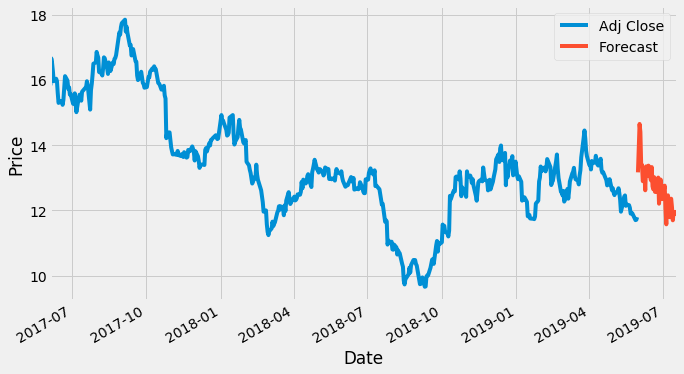

In [38]:
import datetime
plt.figure(figsize=(10,6))
last_date = df1reg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)
for i in y_predicted:
    next_date = next_unix 
    next_unix += datetime.timedelta(days=1)
    df1reg.loc[next_date] = [np.nan for _ in range(len(df1reg.columns)-1)]+[i]

df1['Adj Close'].tail(500).plot()
df1reg['Forecast'].tail(500).plot()
plt.legend(loc= 'best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

##### The above plot is the expected forecast based on existing historical data of Gold stock. The orange color displays the forecast on the stocks price based on regression. The forecast predicted that there is likely downturn for Gold stock for rest of the months in 2019.

#### Predicting The Movement Of The Stock

Creating a new column in the dataframe df1 with the column header ‘y_pred’ and store NaN values in the column. Then storing the values of y_pred into this new column, starting from the rows of the test dataset. This is done by slicing the dataframe using the iloc method. Then dropping all the NaN values from dataset and store them in a new dataframe named gold_trading.

In [39]:
y_predicted = df1.iloc[(len(df1) -len(y_predicted)):, -1:] 
gold_trading = df1.fillna(0)

In [40]:
df1["y_predicted"] = np.NaN
y_predicted = df1.iloc[(len(df1) -len(y_predicted)):, -1:] 
gold_trading = df1.fillna(0)

In [41]:
gold_trading.head()

,Gold,High,Low,Close,Adj Close,Volume,y_predicted
Date,,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700,0.0
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900,0.0
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100,0.0
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100,0.0
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300,0.0


### Computing Strategy Returns

With the predicted values of the Gold stock movement, will compute the returns of the strategy. Taking a long position when the predicted value of y is true and will take a short position when the predicted signal is false.

  - First compute the returns that the strategy will earn if a long position is taken at the end of today, and squared off 
    at the end of the next day. 
  - Creating a new column (tom_ret) in the gold_trading dataset and storing in it a value of 0. 
  - Will use decimal notation to indicate that floating point values will be stored in this new column. 
  - Next, storing in the logarithm of the Adj Close price of today divided by the Adj Close price of yesterday. 
  - Shifting these values upwards by one element so that tomorrow’s returns are stored against the prices of today.
  - Computing the cumulative returns for both the market and the strategy. 
  - Finally plotting the market returns and strategy returns to visualize the performance. 

In [42]:
gold_trading['tom_ret'] = 0
gold_trading['tom_ret'] = np.log(gold_trading['Adj Close'] / gold_trading['Adj Close'].shift(1))
gold_trading['tom_ret'] = gold_trading['tom_ret'].shift(-1)

In [43]:
gold_trading['strg_ret'] = 0
gold_trading['strg_ret'] = np.where(gold_trading['y_predicted'] == True,
                                 gold_trading['tom_ret'], - gold_trading['tom_ret'])

In [44]:
gold_trading['cum_mkt_ret'] = np.cumsum(gold_trading['tom_ret'])
gold_trading['cum_strg_ret'] = np.cumsum(gold_trading['strg_ret'])

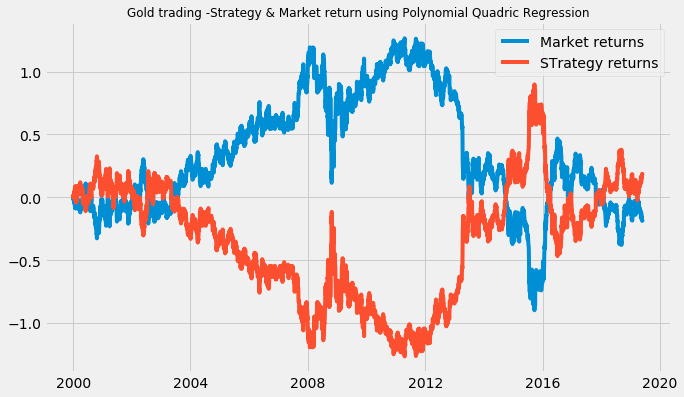

In [46]:
plt.figure(figsize=(10,6))
plt.plot(gold_trading['cum_mkt_ret'], label = 'Market returns')
plt.plot(gold_trading['cum_strg_ret'], label = 'STrategy returns')
plt.title('Gold trading -Strategy & Market return using Polynomial Quadric Regression', fontsize =12)
plt.legend()

## Estimating value at risk via Monte Carlo approach.
Generating future prices via a probability simulation of future outcomes. I will be generating the Gold stock movement based on the asset’s historical volatility. With this historical volatility, there will be an element of randomness or a random “shock.” Volatility, the average daily return, and drift of an asset is determined by analyzing the historical data.

In [47]:
days = (df1.index[-1] - df1.index[0]).days
cagr = ((((df1['Adj Close'][-1]) / df1['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =', str(round(cagr,4)*100)+"%")
mu = cagr
#create a series of percentage returns and calculate 
#the annual volatility of returns
df1['Returns'] = df1['Adj Close'].pct_change()
vol = df1['Returns'].std()*sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = -0.9199999999999999%
Annual Volatility = 42.0%


##### Now we know our mean return input (mu) is -0.919 % and our volatility input (vol) is 42 %

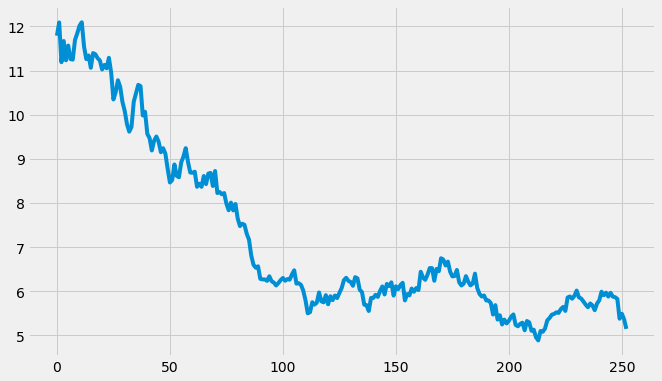

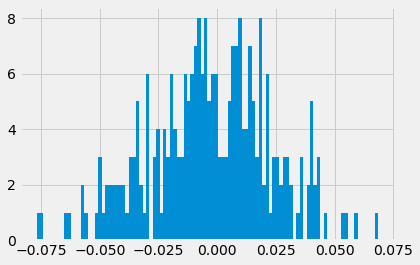

In [49]:
#Define Variables
S = df1['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = -0.919 #Return
vol = 0.42 #Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)
    
#Generate Plots - price series and histogram of daily returns
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

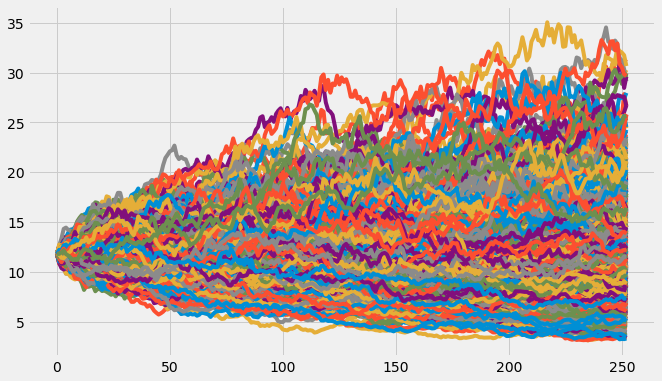

In [50]:
plt.figure(figsize=(10,6))
#Define Variables
S = df1['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = -0.0091 #Return
vol = 0.42 #Volatility
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
#show the plot of multiple price series created above
plt.show()

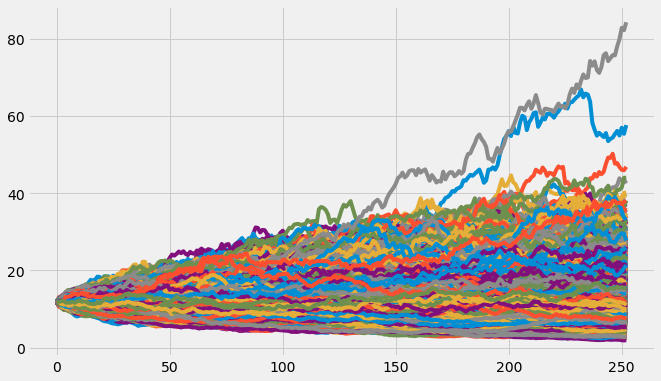

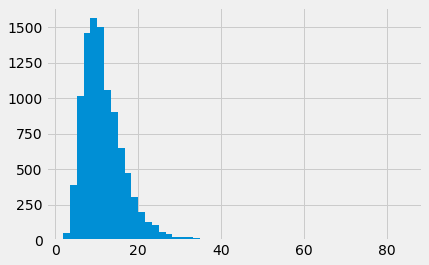

In [51]:
plt.figure(figsize=(10,6))

#setting up empty list to hold our ending values for each simulated price series
result = []

#Define Variables
S = df1['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = -0.0091 #Return
vol = 0.42 #Volatility

#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
        
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
    
#show the plot of multiple price series created above
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [52]:
price_list  # checking the values

[11.79,
 11.85947111879714,
 12.036250718500689,
 12.064813017203157,
 11.633832012809433,
 11.66836239624832,
 11.648342620047803,
 11.811379387055418,
 11.626153918981949,
 11.962786201610081,
 12.315269420388178,
 11.88879710559319,
 11.963395391429911,
 11.914032506541561,
 11.471277761593276,
 11.366562674429394,
 11.306402644812984,
 11.299172528185295,
 11.707777647304091,
 11.464915428493706,
 11.971941006886391,
 12.607710084374451,
 12.843359083421268,
 12.42097025812325,
 12.876891780245908,
 12.841866456597227,
 12.488217874222286,
 12.835416138216145,
 13.08490898398098,
 13.116091372753697,
 13.729458923610144,
 13.884842910232726,
 14.07046840758775,
 13.599918935667423,
 13.644404622459348,
 13.509005502558857,
 13.374836560528637,
 13.603479762565076,
 13.561907280410171,
 13.569227200417538,
 13.237911631332256,
 13.154671607329782,
 13.17093647686026,
 12.27231371907082,
 12.855203993001869,
 12.631907067571332,
 12.63450169401248,
 12.576327359634613,
 12.0998620269

In [53]:
print("Mean value = ", round(np.mean(result),2))
print("5% quantile =", np.percentile(result,5))
print("95% quantile =", np.percentile(result,95))

Mean value =  11.64
5% quantile = 5.316791150612678
95% quantile = 21.053657525391785


##### So now it is clear that, there is a 5% chance that the Gold stock price will end up below around  USD 5.31 and a 5% chance it will finish above USD 21.05.

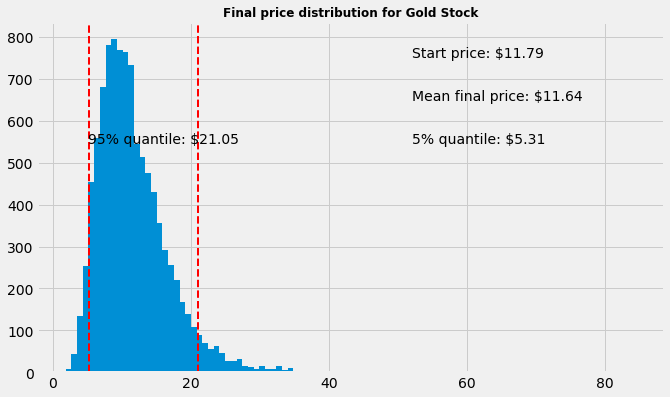

In [56]:
plt.figure(figsize=(10,6))
plt.hist(result,bins= 100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.figtext(0.6,0.8,s="Start price: $%.2f" %S)
plt.figtext(0.6,0.7,"Mean final price: $11.64")
plt.figtext(0.6,0.6,"5% quantile: $5.31")
plt.figtext(0.15,0.6, "95% quantile: $21.05")
plt.title(u"Final price distribution for Gold Stock", weight='bold', fontsize=12)
plt.show()

##### If we compare with Quadric Discriminant Analysis, we can see that, Motne-Carlo produce better approximation (USD 11.64) to the predicted price conaped to DA (USD 13.16) and actual price (USD 11.79) as below. 

In [58]:
# creating en empty matrix such as daily returns
price_list = pd.DataFrame(price_list)
price_list['Adj Close'] = S
price_list.head()

,0,Adj Close
0,11.790000,11.79
1,11.859471,11.79
2,12.036251,11.79
3,12.064813,11.79
4,11.633832,11.79


In [59]:
close = df1['Adj Close']
frames = [close, price_list]
monte_carlo_forecast = pd.concat(frames)
monte_carlo_forecast.head()

,0,Adj Close
1999-12-31 00:00:00,14.105929,NaN
2000-01-03 00:00:00,14.105929,NaN
2000-01-04 00:00:00,13.906553,NaN
2000-01-05 00:00:00,14.155771,NaN
2000-01-06 00:00:00,14.155771,NaN


In [60]:
monte_carlo_forecast.tail()

,0,Adj Close
248,15.810859,11.79
249,15.414292,11.79
250,15.660084,11.79
251,15.430959,11.79
252,15.611556,11.79


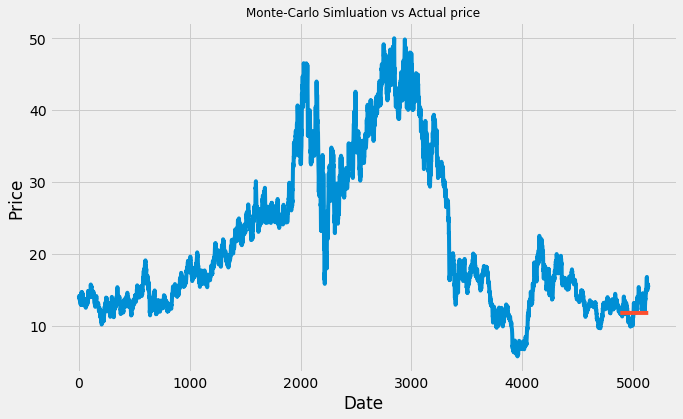

In [62]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
plt.figure(figsize=(10,6))
plt.plot(monte_carlo)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monte-Carlo Simluation vs Actual price', fontsize=12)
plt.show()

##### Monte_Carlo simulation has been plotted againt the original data to draw a comparison with regression plot above (Plotting the Prediction)


### Artificial Neural Network 
##### Multilayer perceptron (MLP) with original data)

Traditional time series approach e.g. ARIMA model etc. require stationary series. However, real life data is messy and there is unlikely a stationarity series as new data is added while implementing these models in a live trading system. Advantage with Neural networks is, they do not require any stationarity to be used. Moreover, neural networks are quite effective in finding the relationships between data and using it to predict new data.

The model demonstrated on the original data. It will just 2-hidden layer perceptron and number of hidden neurons are chosen here empirically. Between two hidden layers another Dropout is added layer to prevent overfitting. Dropout drops first 25 data points. 

In [84]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score

# Initialize the graph
graph = tf.Session()

# Hyperparameters for model: 
num_features = X_train.shape[1]
num_layers_1 = 512
num_layers_2 = 256
num_layers_3 = 128

In [85]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, num_features])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [86]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [87]:
# weights 
W1 = tf.Variable(tf.random_normal([num_features, num_layers_1], stddev=(1/tf.sqrt(float(num_features)))))
W2 = tf.Variable(tf.random_normal([num_layers_1, num_layers_2], stddev=(1/tf.sqrt(float(num_layers_1)))))
W3 = tf.Variable(tf.random_normal([num_layers_2, num_layers_3], stddev=(1/tf.sqrt(float(num_layers_1)))))

#bias
b1 = tf.Variable(tf.random_normal([num_layers_1]))
b2 = tf.Variable(tf.random_normal([num_layers_2]))
b3 = tf.Variable(tf.random_normal([num_layers_3]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([num_layers_3, 1]))
b_out = tf.Variable(bias_initializer([1]))

In [88]:
# Hidden layer
h1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
h2 = tf.nn.relu(tf.add(tf.matmul(h1, W2), b2))
h3 = tf.nn.relu(tf.add(tf.matmul(h2, W3), b3))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(h3, W_out), b_out))

In [89]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [90]:
# using ADAM method to minimize the loss function
opt = tf.train.AdamOptimizer().minimize(mse)

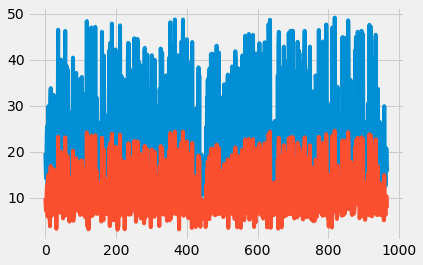

11.113642


In [91]:
# Make Session
net = tf.Session()

# Run initializer
net.run(tf.global_variables_initializer())

# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Number of epochs and batch size
epochs = 10
batch_size = 100
for e in range(epochs):
    
    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]
    
    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})
        
        # Show progress
        if np.mod(i, 5) == 0:
            
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            
# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

In [94]:
#pred = net.run(out, feed_dict = {X: X_test})
y_pred = pred[0]

In [95]:
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test, y_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_test, y_pred))



Mean absolute error (MAE):      2.546089
Mean squared error (MSE):       11.575063
Root mean squared error (RMSE): 3.402214
R square (R^2):                 0.896203


##### After 10 epochs, the fit appears good with test data. 
  - The final test MSE equals 11.34 (it is low, because the target is scaled). 
  - The mean absolute percentage error of the forecast on the test set is equal to 2.51% is sign. 
  - Coefficient of determination (R2) is 89%, which shows efficiency of model; this is very similar to regression fit model
    (89.79). 

In [96]:
df1["y_pred"] = np.NaN
y_pred = df1.iloc[(len(df1) -len(y_pred)):, -1:] 
gold_trading = df1.fillna(0)
df1.tail()

,Gold,High,Low,Close,Adj Close,Volume,y_predicted,Returns,y_pred
Date,,,,,,,,,
2019-05-23,12.02,12.24,11.96,11.96,11.919285,13787100,NaN,0.001675,NaN
2019-05-24,12.00,12.00,11.75,11.95,11.909319,11025500,NaN,-0.000836,NaN
2019-05-28,11.70,11.85,11.65,11.74,11.700034,10656200,NaN,-0.017573,NaN
2019-05-29,11.73,11.97,11.73,11.75,11.710000,11073100,NaN,0.000852,NaN
2019-05-30,11.76,11.87,11.66,11.79,11.790000,9272600,NaN,0.006832,NaN


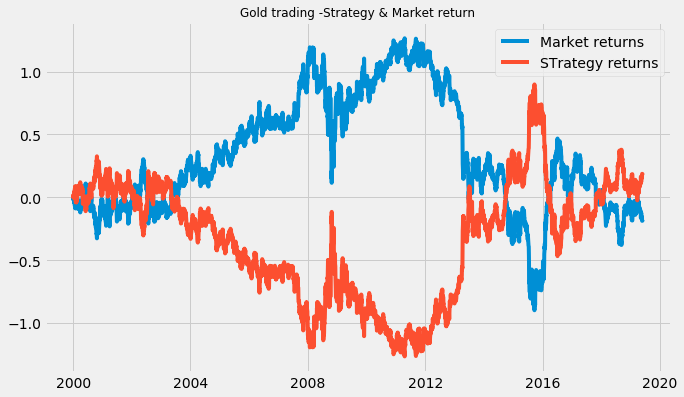

In [97]:
gold_trading['tom_ret'] = 0
gold_trading['tom_ret'] = np.log(gold_trading['Adj Close'] / gold_trading['Adj Close'].shift(1))
gold_trading['tom_ret'] = gold_trading['tom_ret'].shift(-1)

gold_trading['strg_ret'] = 0
gold_trading['strg_ret'] = np.where(gold_trading['y_pred'] == True,
                                 gold_trading['tom_ret'], - gold_trading['tom_ret'])

gold_trading['cum_mkt_ret'] = np.cumsum(gold_trading['tom_ret'])
gold_trading['cum_strg_ret'] = np.cumsum(gold_trading['strg_ret'])

plt.figure(figsize=(10,6))
plt.plot(gold_trading['cum_mkt_ret'], label = 'Market returns')
plt.plot(gold_trading['cum_strg_ret'], label = 'STrategy returns')
plt.title('Gold trading -Strategy & Market return', fontsize =12)
plt.legend()

#### The above plot looks simialr to Quadric regression fit model. So, it can be concluded that, with this dataset, Monte-Carlo simulation would be a better bet for investing in this stock.

### Future Improvements/ Challenges

To further analyse the stocks in future the economic factors such as USD index, Interest rate index can be considered. 

   - Interest rate in an economy not only reflects, but influences economic activities. Therefore, the effect of inflation and 
     interest rate on return will be for future analysis. 
   - USD index too a influential factor. We are aware of the tweet from US president which says, "China, the E.U. and others 
     have been manipulating their currencies and interest rates lower, while the U.S. is raising rates and the USD gets 
     stronger — taking away our big competitive edge. As usual, not a level playing field..." and soon after that tweet the 
     USD Index fell more than 1%.